# Project Proposal - Predicting the Likelihood of Heart Conditions based on _________ 

#### Lisa Li, Jovan Kannitho, Justin An, Tammy Ou

## Introduction

As one of the top leading causes of death, heart disease refers to a variety of heart conditions that affect the functioning of the heart or blooed vessels. With such pertinence, it is useful to identify predictors that can consistenly predict heart disease outcomes. 

Heart disease outcomes can be determined by a variety of factors, including lifestyle and genetic conditions. We found a dataset that tracked instances of heart disease within individuals, with 76 attributes, across 4 different locations (Cleveland, Hungary, Switzerland and VA Long Beach). Although there are 76 attributes, only a subset of 14 attributes are used in all published experiments (age, sex, chest pain type, resting blood pressure, cholesterol levels, fasting blood sugar, resting ECG, maximum heart rate, exercise induced angina, ST depression induced by exercise relative to rest, slope of peak exercise ST segment, number of major vessels, thallium scintigraphic defect, and the predicted heart disease outcome). 

The Cleveland dataset is also the only one that have been used by Machine Learning researchers to date. 

In our study, we will work with the VA Long Beach data, as research has mainly focused on the Cleveland data set. We aim to choose the 3 most significant predictors, and apply the knn classification algorithm to answer the question of: **Based on the (top 3 relevant predictors), is an individual likely to develop heart disease?**

## Preliminary data exploration analysis

In [12]:
# install.packages("psych")
# install.packages("ggcorrplot")
library(tidyverse)
library(tidymodels)
library(dplyr)
library(RColorBrewer)
library(kknn)
library(psych)
library(ggcorrplot)

### Loading and Cleaning Data

In [13]:
#reading data and changing names of the columns
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data"
column_names <- c("age",
                  "sex",
                  "chest_pain",
                  "resting_bp",
                  "cholestrol", 
                  "fasting_bp",
                  "resting_ecg",
                  "max_hrate_achieved",
                  "exercise_induced_angina",
                  "st_depression",
                  "slope",
                  "major_vessels",
                  "thalassemia", # too much iron in blood
                  "num")


va_heart_data <- read_csv(url,
                    col_names = c(column_names),
                    col_types = list("d", "f", "f", "d", "d", "f", "f", "d", "f", "d", "f", "i", "f", "d")) 

# changed diagnosis levels of 0-4 to True and False 
# if True -> presence of heart disease (original values 1-4) , False -> absence of heart disease (original value of 0)
va_heart_data_clean <- va_heart_data |>
    mutate(diagnosis = num > 0) 
    
                                  
#changing all unknown values (?) to NA values
va_heart_data_clean[va_heart_data_clean == "?"] <- NA 
va_heart_data_clean

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”


age,sex,chest_pain,resting_bp,cholestrol,fasting_bp,resting_ecg,max_hrate_achieved,exercise_induced_angina,st_depression,slope,major_vessels,thalassemia,num,diagnosis
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<int>,<fct>,<dbl>,<lgl>
63,1,4,140,260,0,1,112,1,3.0,2,NA,NA,2,TRUE
44,1,4,130,209,0,1,127,0,0.0,NA,NA,NA,0,FALSE
60,1,4,132,218,0,1,140,1,1.5,3,NA,NA,2,TRUE
55,1,4,142,228,0,1,149,1,2.5,1,NA,NA,1,TRUE
66,1,3,110,213,1,2,99,1,1.3,2,NA,NA,0,FALSE
66,1,3,120,0,0,1,120,0,-0.5,1,NA,NA,0,FALSE
65,1,4,150,236,1,1,105,1,0.0,NA,NA,NA,3,TRUE
60,1,3,180,0,0,1,140,1,1.5,2,NA,NA,0,FALSE
60,1,3,120,0,NA,0,141,1,2.0,1,NA,NA,3,TRUE


We have successfully cleaned and tidied our data as it fits the follwoing 3 requirements: 

1. each row is a single observation
2. each column is a single variable
3. each value is a single cell 

In [14]:
From a quick inspection of the data, we also notice that there are lots of males in the data set. Doing a quick count, we see that there are much more
males than females in our data set. Thus, sex is probably not a good variable to use in our analyses. 

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: From a
         ^


In [15]:
count_sex <- va_heart_data_clean |>
   group_by(sex) |>
   summarize(count=n()) 

count_sex

sex,count
<fct>,<int>
1,194
0,6


### Summary of Data

By using 75% of our data for training and 25% of our data for testing will enable us to develop a more accurate model to for predictions. A seed was used to ensure that the random distrubution is reproducable. 

In [86]:
set.seed(1)
va_split <- initial_split(va_heart_data_clean, prop = .75, strata = diagnosis)
va_train <- training(va_split)
va_test <- testing(va_split)


In [18]:
# va_train |>
# summarize(across(age:diagnosis, mean, na.rm = TRUE))

na_count <- colSums(is.na(va_train))

na_count

#from this na count, we can see that major vessels and thalassemia columns have a lot of missing values, so we will not use these variables as predictors

va_train_select <- va_train |>
                   select(-thalassemia,-major_vessels)


age                     sex              chest_pain 
                      0                       0                       0 
             resting_bp              cholestrol              fasting_bp 
                     47                       3                       5 
            resting_ecg      max_hrate_achieved exercise_induced_angina 
                      0                      45                      45 
          st_depression                   slope           major_vessels 
                     47                      79                     148 
            thalassemia                     num               diagnosis 
                    121                       0                       0

In [21]:
#split our va_train_select into two dataframes: one with our numeric (num) variables, and one with our categorical (cat) variables

va_train_select_num <- va_train_select |>
                        select(age, resting_bp, cholestrol, max_hrate_achieved, st_depression, diagnosis)

va_train_select_cat <- va_train_select |>
                        select(sex, chest_pain, fasting_bp, resting_ecg, exercise_induced_angina, slope, diagnosis)

A correlation matrix of our training data will allow us to find the variables with the highest impact on heart disease that we can use in our knn algorithm. Using the numeric variables makes most sense with the correlational matrix, and our knn classification algorithm. We are still keeping the categorical variables, as they might be useful for future visualizations (eg. we could colour the graph of age and presence of heart disease by chest pain type).

In [87]:
#omiting all NA variables in the dataset
va_train_select_num_noNA  <- va_train_select_num |>
  mutate(across(everything(), ~ifelse(. == "?", NA, .))) |>
  na.omit()

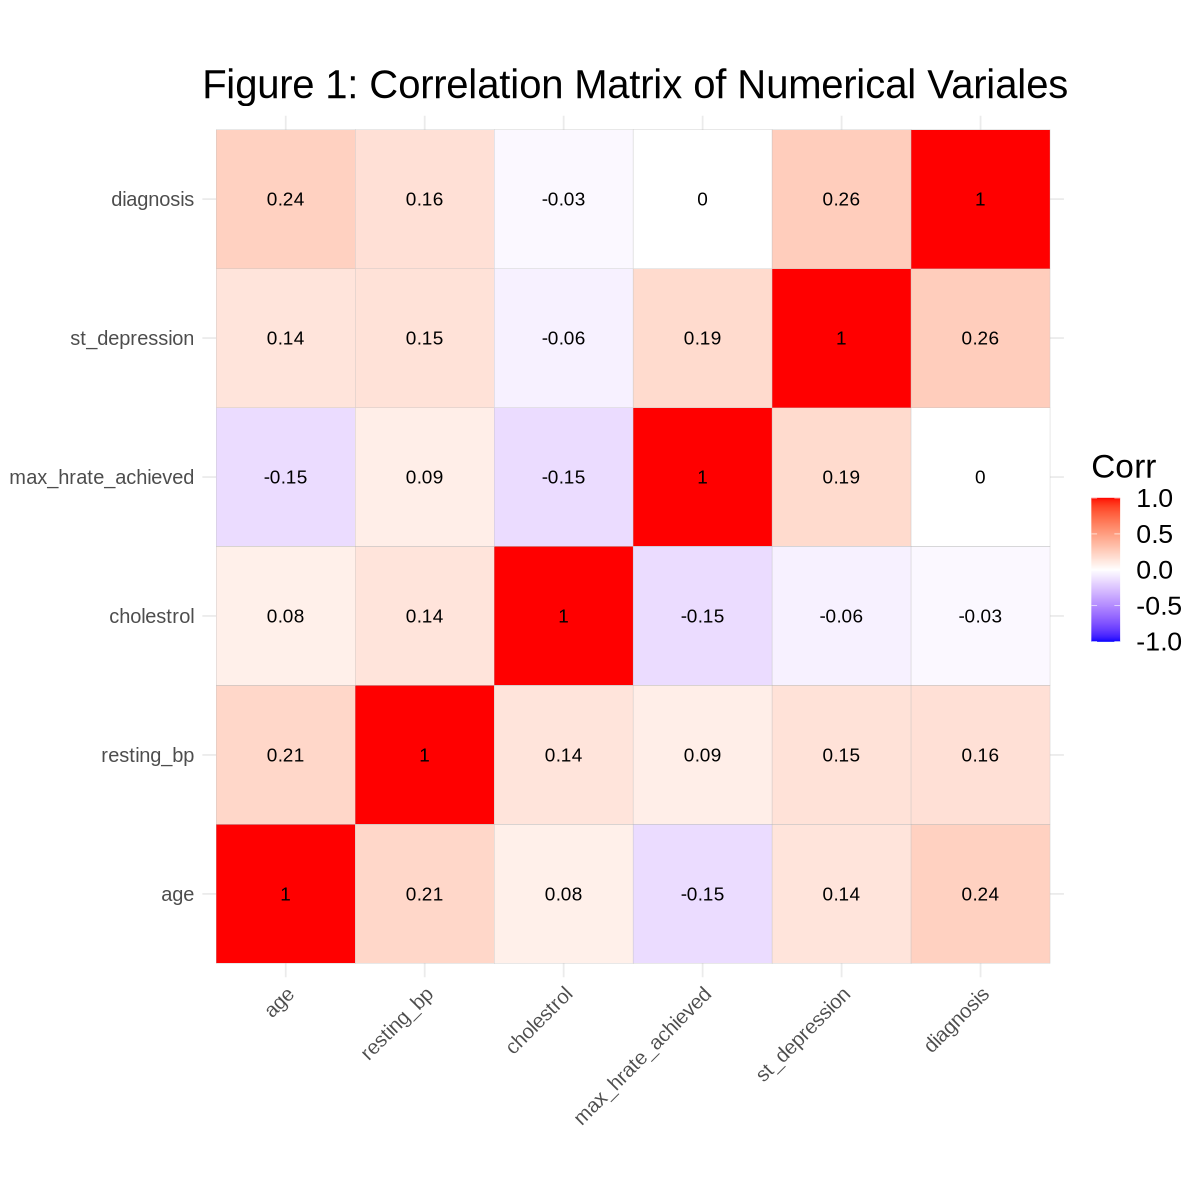

In [23]:
#making a correlation matrix of data using cor()
options(repr.plot.width = 10, repr.plot.height = 10)
correlation_matrix <- cor(va_train_select_num_noNA)

#creating a plot of the results 
ggcorrplot(correlation_matrix, lab = TRUE) + 
    labs(title = "Figure 1: Correlation Matrix of Numerical Variales") + 
    theme(text = element_text(size = 20))


While the variables only have a weak correlation with diagnosis, the correlation matrix determines st depression, age and resting blood pressure to have the highest impact on determining the presence of heart disease for our data set. Thus we will choose these variables as our predictor variables to use in the knn classification algorithm. We will expore these variable further by summarizing their data.

In [65]:
#selecting the 3 vairables with the highest correlation to heart disease as determined by correlation matrix
#renamed columns to increase clarity
va_heart_data_top_3 <-select(va_train_select_num_noNA, "diagnosis", "st_depression","age", "resting_bp")


In [75]:
#summarize each predictor using mean and standard deviation, grouped by diagnosis 

count_sex <- va_heart_data_top_3 |>
   group_by(diagnosis) |>
   summarize(count=n()) 

count_sex

summary_st_depression <- va_heart_data_top_3 |>
         group_by(diagnosis) |>
         summarize(mean_st_depression = mean(st_depression),
                   sd_st_depression = sd(st_depression))

summary_age <- va_heart_data_top_3 |>
         group_by(diagnosis) |>
         summarize(mean_age = mean(age), sd_age = sd(age)) 



summary_resting_bp <- va_heart_data_top_3 |>
         group_by(diagnosis) |>
         summarize(mean_resting_bp = mean(resting_bp),sd_resting_bp = sd(resting_bp))



summary_st_depression
summary_age
summary_resting_bp



diagnosis,count
<lgl>,<int>
FALSE,22
TRUE,77


diagnosis,mean_st_depression,sd_st_depression
<lgl>,<dbl>,<dbl>
FALSE,0.750000,0.9480557
TRUE,1.445455,1.0947897


diagnosis,mean_age,sd_age
<lgl>,<dbl>,<dbl>
FALSE,56.09091,10.596087
TRUE,60.61039,6.627605


diagnosis,mean_resting_bp,sd_resting_bp
<lgl>,<dbl>,<dbl>
FALSE,130.4545,18.23583
TRUE,137.4026,18.10078


From this summary, we can see that  the means of st_depression, age and resting_bp are all higher for those who have heart disease compared to those who do not. Looking at the standard deviation, we can see that the variability is rather similar between diagnosis groups per variable, except for st_depression, where the variability is much higher for those who do not have heart disease.

### Visualization of Data

To visualize our training data, we decided to create histograms to compare the distributions of the three predictor variables that we chose (age, ST depression and resting blood pressure). For each variable, we further split the comparison via diagnosis, to compare if there are any differences between individuals who have heart disease and individuals who do not.

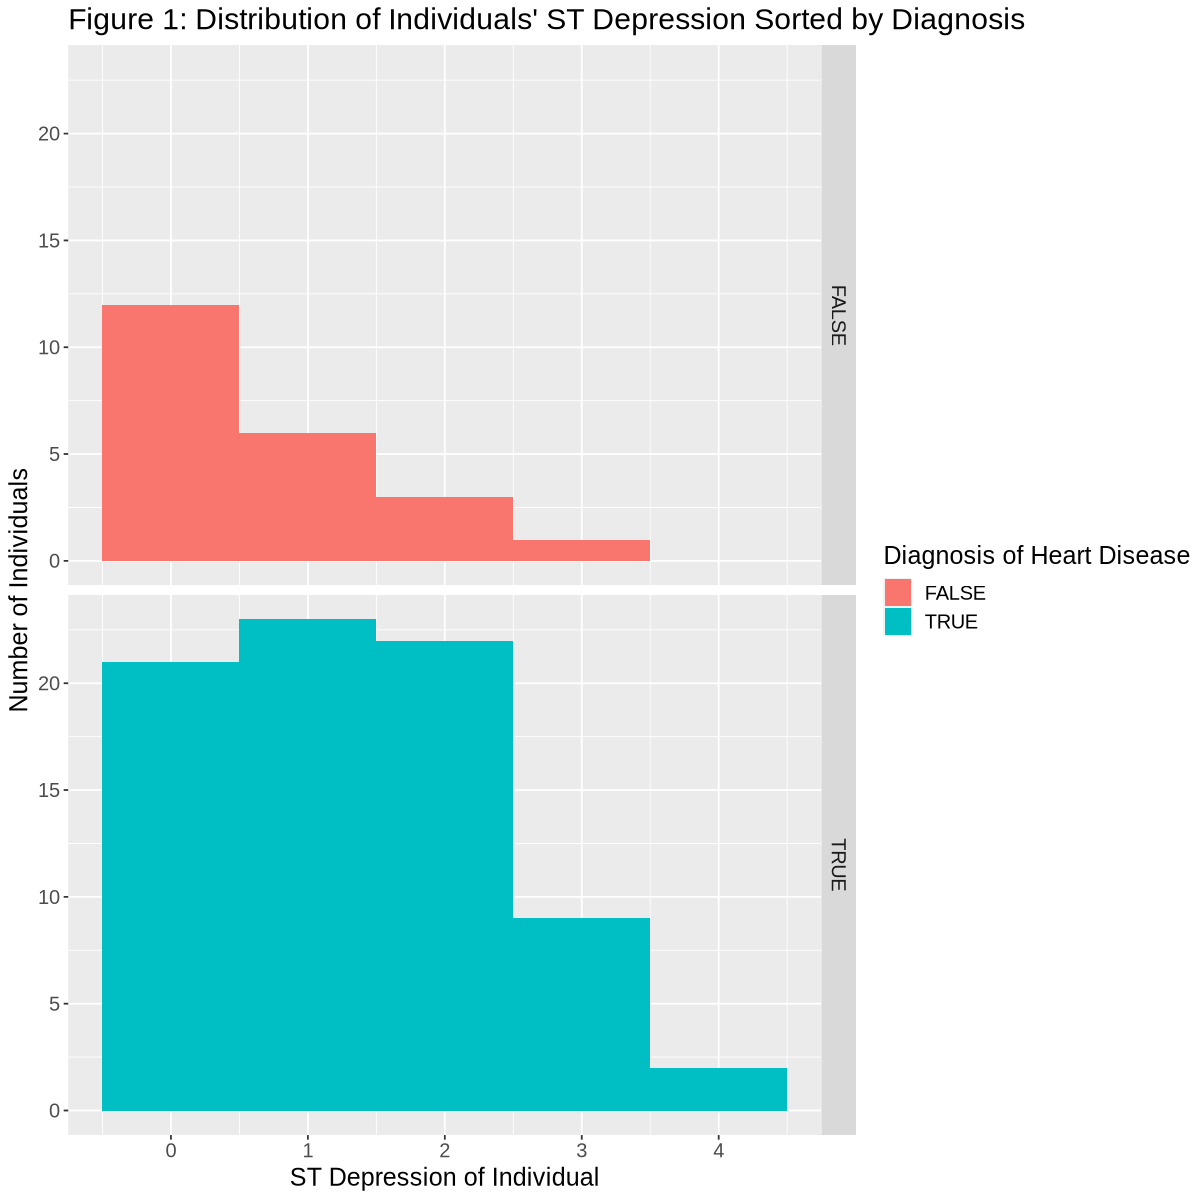

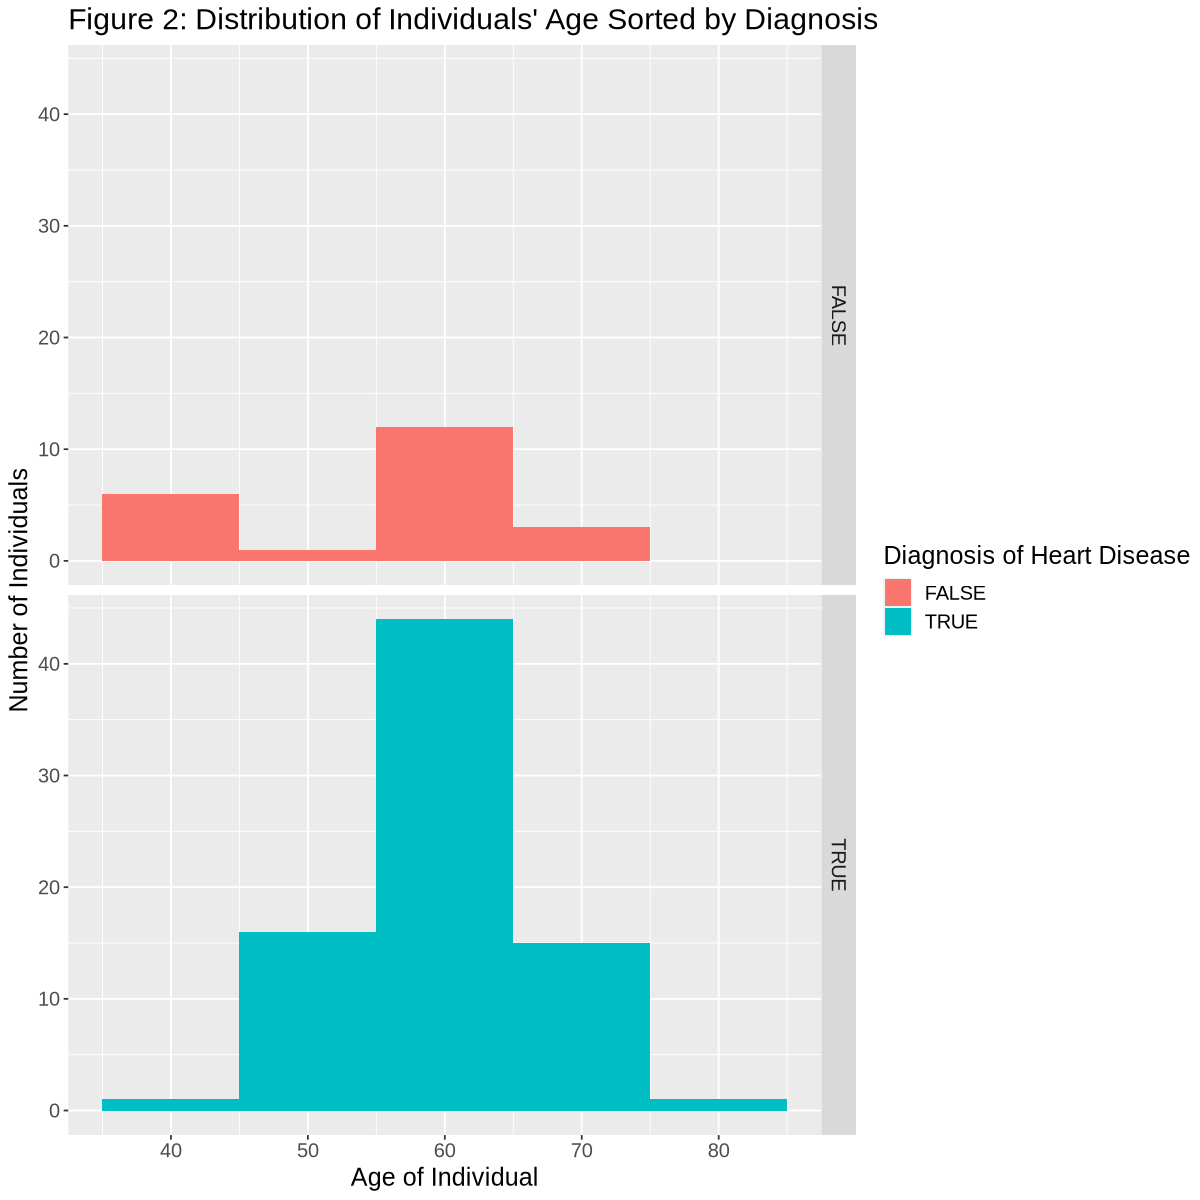

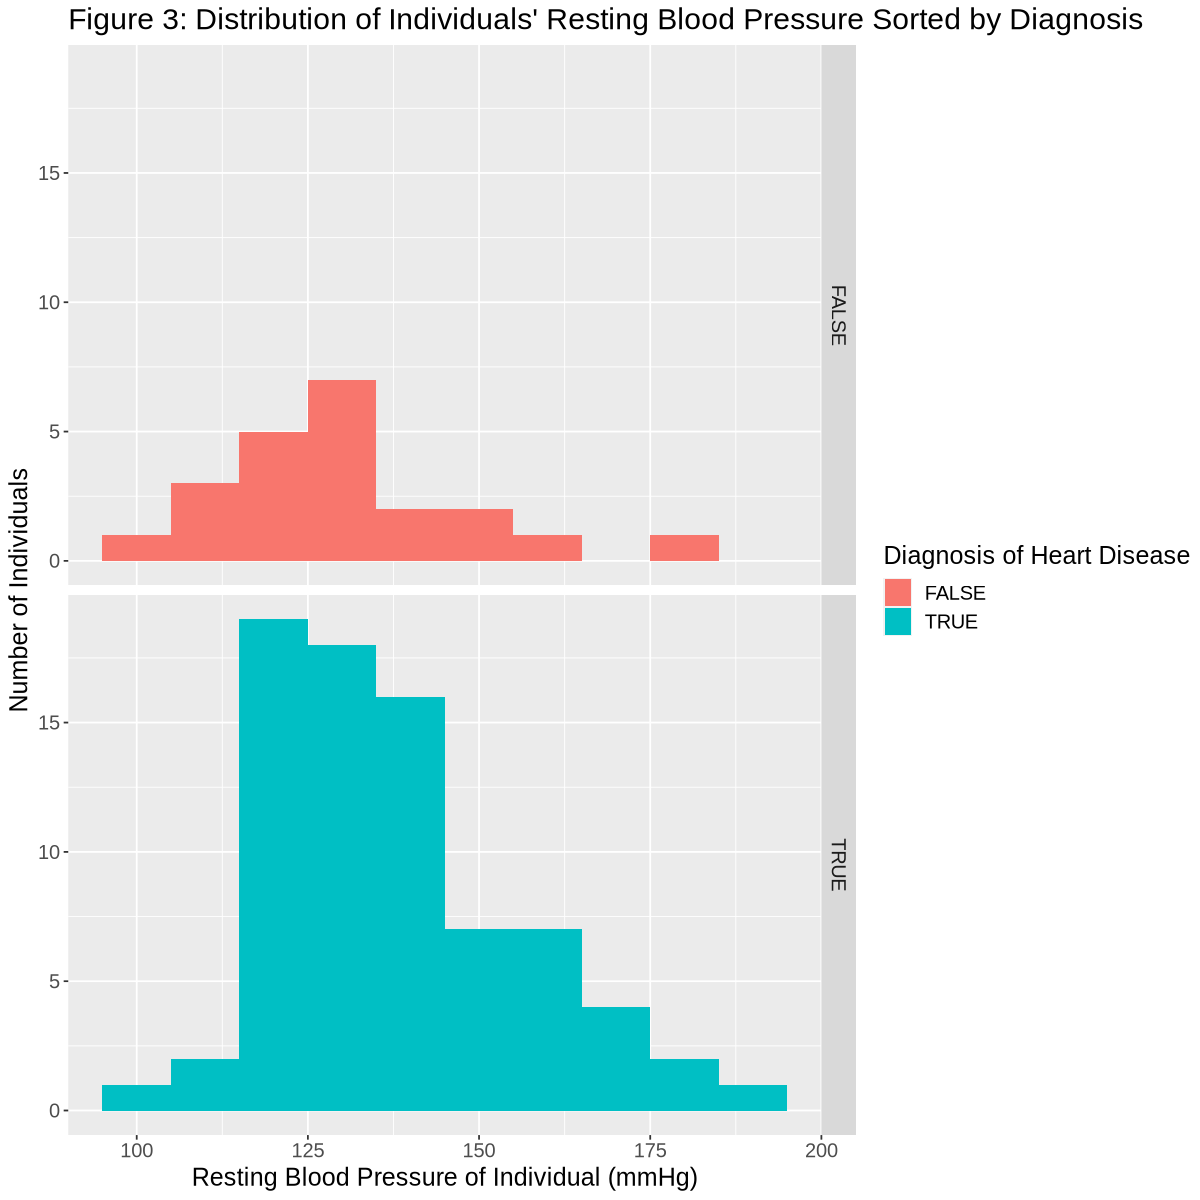

In [84]:
options(repr.plot.width = 10, repr.plot.height = 10)


st_depression_plot <- va_train_select_num_noNA |>
                       select(diagnosis, st_depression) |>
                        ggplot(aes(x = st_depression, fill=diagnosis)) +
                        geom_histogram(binwidth=1) +
                        facet_grid(rows = vars(diagnosis)) + 
                        labs (x = "ST Depression of Individual",
                              y = "Number of Individuals", 
                              fill = "Diagnosis of Heart Disease",
                              title = "Figure 1: Distribution of Individuals' ST Depression Sorted by Diagnosis") + 
                              theme(text = element_text(size = 15))
                              

age_plot <- va_train_select_num_noNA |>
                       select(diagnosis, age) |>
                        ggplot(aes(x = age, fill=diagnosis)) +
                        geom_histogram(binwidth =10) +
                        facet_grid(rows = vars(diagnosis)) +
                        labs (x = "Age of Individual",
                              y = "Number of Individuals", 
                              fill = "Diagnosis of Heart Disease", 
                              title = "Figure 2: Distribution of Individuals' Age Sorted by Diagnosis") + 
                        theme(text = element_text(size = 15))

resting_bp_plot <- va_train_select_num_noNA |>
                       select(diagnosis, resting_bp) |>
                        ggplot(aes(x = resting_bp, fill=diagnosis)) +
                        geom_histogram(binwidth =10) +
                        facet_grid(rows = vars(diagnosis)) +
                        labs (x = "Resting Blood Pressure of Individual (mmHg)",
                              y = "Number of Individuals", 
                              fill = "Diagnosis of Heart Disease",
                              title = "Figure 3: Distribution of Individuals' Resting Blood Pressure Sorted by Diagnosis") + 
                        theme(text = element_text(size = 15))

st_depression_plot
age_plot
resting_bp_plot


From the graphs above, the distributions shows us that values for individuals with heart disease tend to be in the higher end of the distribution when compared to those without
heart disease. However, it is important to note that there is considerable overlap between the two groups for each variable. 

## Methods

In [ ]:
For our methods, we aim to explore the 